In [1]:
data = read.csv(url("https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/3acf79c0-a5f5-4d9a-a30d-fb5ceba4b60a/download/service_inventory.csv"), na.strings = c("ND", "NA"))

[1] "Agriculture and Agri-Food Canada"                   
 [2] "Canada Border Services Agency"                      
 [3] "Canadian Food Inspection Agency"                    
 [4] "Immigration, Refugees and Citizenship Canada"       
 [5] "Canada Revenue Agency"                              
 [6] "Canada School of Public Service"                    
 [7] "Employment and Social Development Canada"           
 [8] "Innovation, Science and Economic Development Canada"
 [9] "Public Services and Procurement Canada"             
[10] "Shared Services Canada"                             
[11] "Veterans Affairs Canada"

[1] 1034   37

     fiscal_yr     service_id  
 2016-2017:347   1464   :   5  
 2017-2018:338   1548   :   5  
 2018-2019:349   1      :   3  
                 10     :   3  
                 1001   :   3  
                 1003   :   3  
                 (Other):1012  
                                                                                          service_name_en
 Access to Information and Privacy                                                                :   5  
 Administration of Grants and Contributions (Gs&Cs) for Employment and Social Development Programs:   3  
 Administration of the Corrections and Conditional Release Regulations                            :   3  
 Advance Rulings and National Customs Rulings                                                     :   3  
 Advertising – Coordination and Training Services                                                 :   3  
 Agricultural Greenhouse Gas Program                                                              :   3  
 (


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




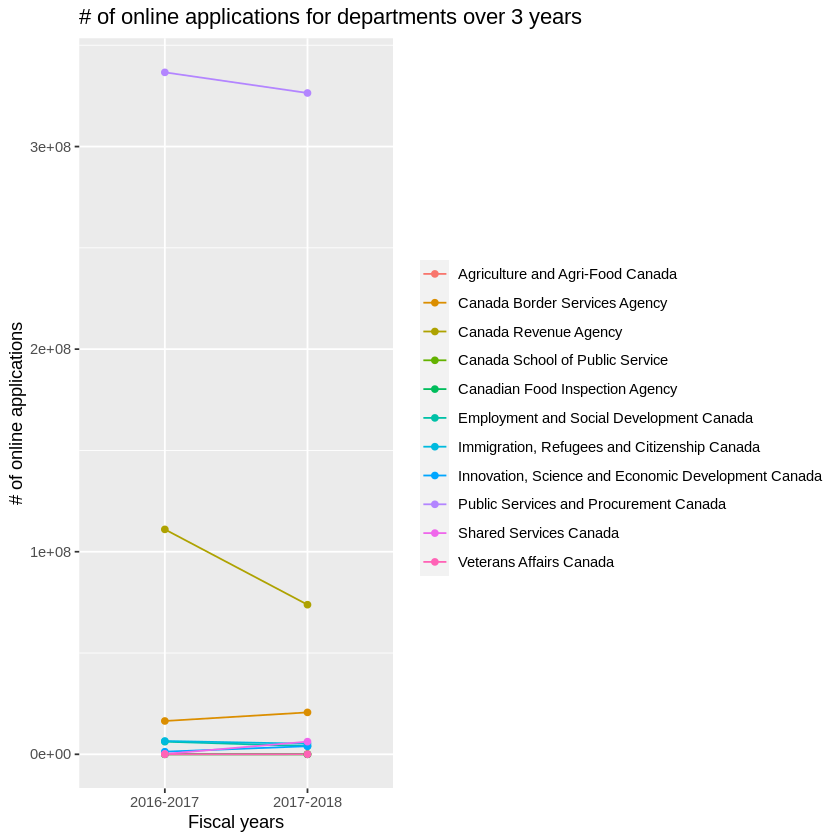

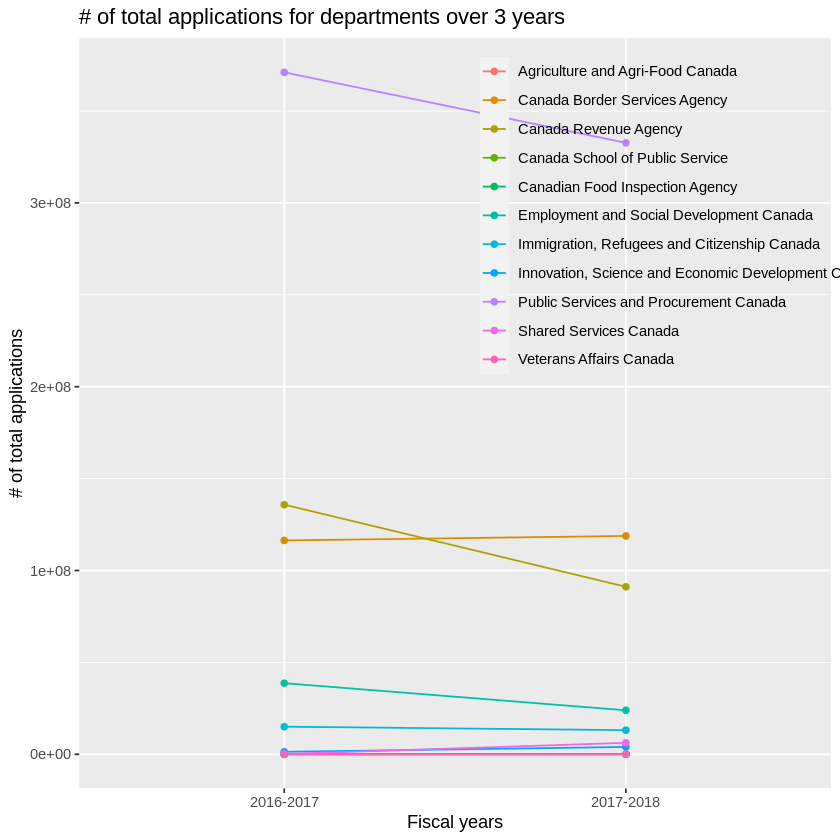

In [2]:
data$web_visits_info_service = as.numeric(data$web_visits_info_service)
data$calls_received = as.numeric(data$calls_received)
data$in_person_applications = as.numeric(data$in_person_applications)
data$postal_mail_applications = as.numeric(data$postal_mail_applications)
data$other_applications = as.numeric(data$other_applications)
data$online_applications = as.numeric(data$online_applications)

# select 11 deparments with records in 3 fiscal years
data1=unique(data[which(data$fiscal_yr==data$fiscal_yr[1]),]$department_name_en)
data2=unique(data[which(data$fiscal_yr==data$fiscal_yr[2]),]$department_name_en)
data3=unique(data[which(data$fiscal_yr==data$fiscal_yr[3]),]$department_name_en)
inter=intersect(data1,data2)
dep=intersect(inter,data3)
dep
# only remain data with 11 departments
data=data[which(data$department_name_en %in% dep),]
dim(data) # 1865 to 1034 rows
summary(data)

# drop the last year because of large NDs
data=data[-which(data$fiscal_yr=="2018-2019"),]

# drop use_of_sin because it has more than one half missing values
data=data[,-12]

# sum the number of online applications(can be anything) by departent and year
a=aggregate(data$online_applications, by=list(data$department_name_en, data$fiscal_yr), FUN=sum, na.rm=TRUE)
library(ggplot2)
library(dplyr)
ggplot(a, aes(x=Group.2, y=x, group=Group.1, color=Group.1)) +
geom_line()+geom_point()+ggtitle("# of online applications for departments over 3 years")+
xlab("Fiscal years")+ylab("# of online applications")+theme(legend.title = element_blank(), legend.position = "right", legend.background = element_rect(fill = "transparent"))

# compute total applications for each row
data[,24]=data$in_person_applications+data$postal_mail_applications+data$other_applications+data$online_applications
colnames(data)[24]="sum"
# sum the number of total applications by department and year
b=aggregate(data$sum, by=list(data$department_name_en, data$fiscal_yr), FUN=sum, na.rm=TRUE)
ggplot(b, aes(x=Group.2, y=x, group=Group.1, color=Group.1)) +
  geom_line()+geom_point()+ggtitle("# of total applications for departments over 3 years")+
  xlab("Fiscal years")+ylab("# of total applications")+theme(legend.title = element_blank(), legend.position = c(0.8, 0.77), legend.background = element_rect(fill = "transparent"))
